# SiGesGuarda Database

In this notebook, I create different subsets of the criminalBehaviour database

To do a temporal prediction:

- db_criminalBehaviour_byYear.csv : group by year and create a 'count' feature indicating how many times the problem happened in each year

- db_criminalBehaviour_byMonth.csv : group by year and month, and create a 'count' feature indicating how many times the problem happened in each month of each year

- db_criminalBehaviour_byWeekDay.csv : group by year, month, and week day, and create a 'count' feature indicating how many times the problem happened in each week day of each month of each year

To do a clustering by neighbourhood:

- db_criminalBehaviour_byNeighbourhood.csv : group by year, month, week day, and neighbourhood, and create a 'count' feature indicating how many times the problem happened for each combination of these features

To predict chances of having a problem by time of the day and regional 

- db_criminalBehaviour_TimeRegional.csv

Importing packages

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from unidecode import unidecode
from pycircular.utils import date2rad

Definition of global parameters for the pyplot

In [54]:
SMALL_SIZE = 8 # points
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.rcParams['figure.facecolor']   = 'white'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.facecolor']     = 'white'
plt.rcParams['axes.spines.right']  = False
plt.rcParams['axes.spines.top']    = False
plt.rcParams['font.family']        = 'sans-serif'
plt.rcParams['font.sans-serif']    = ['Arial', 'DejaVu']
plt.rcParams['savefig.dpi']        = 300
plt.rcParams['svg.fonttype']       = 'none'
plt.rcParams['pdf.fonttype']       = 42
plt.rcParams['ps.fonttype']        = 42

cm = 1/2.54  # centimeters in inches
single_col = 8.9*cm
oneDot5_col = 12.7*cm
two_col = 18.2*cm

In this notebook, we read the database of criminal behaviour and create other sub-datasets, which will be used as input for the ML:

- data by year
- data by year and month
- data by year, month, and week day
- data by year, month, week day and neighbourhood

In [55]:
df = pd.read_csv('./processed_db/db_criminalBehaviour.csv', sep="\t")


C:\Users\vanes\AppData\Local\Temp\ipykernel_7204\4194427880.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./processed_db/db_criminalBehaviour.csv', sep="\t")


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90086 entries, 0 to 90085
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               90086 non-null  int64  
 1   neighbourhood            90046 non-null  object 
 2   urban_facility           44012 non-null  object 
 3   flag_urban_facility      90086 non-null  object 
 4   flag_flagrant            90086 non-null  object 
 5   street_name              90051 non-null  object 
 6   flag_civil_protection_1  90086 non-null  int64  
 7   problem_type_1           90086 non-null  object 
 8   flag_civil_protection_2  5717 non-null   float64
 9   problem_type_2           5717 non-null   object 
 10  flag_civil_protection_3  465 non-null    float64
 11  problem_type_3           465 non-null    object 
 12  flag_civil_protection_4  77 non-null     float64
 13  problem_type_4           77 non-null     object 
 14  flag_civil_protection_

In [57]:
weekDay = [int(x.split('-')[0]) for x in df['week_day']]
weekDay = np.array(weekDay)

df['hour_rads']  = date2rad(df['time'], time_segment='hour')
df['weekDay_rads'] = date2rad(weekDay, time_segment='dayweek')


In [58]:
df.head()

,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,street_name,flag_civil_protection_1,problem_type_1,flag_civil_protection_2,problem_type_2,...,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,categories,hour_rads,weekDay_rads
0,2,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Robbery,NaN,NaN,...,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN,1,CriminalBehaviour,3.926991,6.058786
1,9,CENTRO,NaN,NÃO,SIM,PRESIDENTE FARIA,0,Robbery,NaN,NaN,...,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,GOE,NaN,NaN,1,CriminalBehaviour,4.188790,6.058786
2,10,BOA VISTA,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL NOSSA ...,SIM,NÃO,SANTA EDWIGES,0,Break-in,NaN,NaN,...,BOA VISTA,SECRETARIA MUNICIPAL DA EDUCAÇÃO,SME,NORMAL,NaN,NaN,1,CriminalBehaviour,3.141593,6.058786
3,13,CENTRO,NaN,NÃO,NÃO,TIRADENTES,0,Illitcit Substance,NaN,NaN,...,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN,1,CriminalBehaviour,3.926991,6.058786
4,22,CIDADE INDUSTRIAL,CENTRO DE EDUCAÇÃO INTEGRAL PADRE FRANCISCO...,SIM,NÃO,JOSÉ TISSI,0,Break-in,NaN,NaN,...,CIC,SECRETARIA MUNICIPAL DA EDUCAÇÃO,SME,NORMAL,NaN,NaN,1,CriminalBehaviour,2.617994,6.058786


In [17]:
groups = ['year','categories','problem_type_1']
df_byYear = df.groupby(groups).count()
df_byYear.reset_index(inplace=True)
df_byYear.sort_values(by=["year"], ascending=True)
df_byYear.head(10)

,year,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,street_name,flag_civil_protection_1,...,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,hour_rads,weekDay_rads
0,2009,CriminalBehaviour,Abandonment/nonsupport of incompetent person,14,14,10,14,14,14,14,...,14,14,14,14,14,0,0,14,14,14
1,2009,CriminalBehaviour,Abuse of incapacitated persons,2,2,2,2,2,2,2,...,2,2,2,2,2,0,0,2,2,2
2,2009,CriminalBehaviour,Agression,297,297,228,297,297,297,297,...,297,297,297,297,297,0,0,297,297,297
3,2009,CriminalBehaviour,Break-in,925,924,594,925,925,925,925,...,925,925,925,925,925,0,52,925,925,925
4,2009,CriminalBehaviour,Child grooming/enticement,2,2,2,2,2,2,2,...,2,2,2,2,2,0,0,2,2,2
5,2009,CriminalBehaviour,Corporal injury,25,25,19,25,25,25,25,...,25,25,25,25,25,0,0,25,25,25
6,2009,CriminalBehaviour,Crime against individual liberty,3,3,2,3,3,3,3,...,3,3,3,3,3,0,0,3,3,3
7,2009,CriminalBehaviour,Crime apology,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
8,2009,CriminalBehaviour,Embezzlement,3,3,0,3,3,3,3,...,3,3,3,3,3,0,0,3,3,3
9,2009,CriminalBehaviour,Environmental crime,16,16,5,16,16,16,16,...,16,16,16,16,16,0,0,16,16,16


In [18]:
columns2keep = groups + ['count']
columns2drop = set(df_byYear.columns) - set(columns2keep)
df_byYear['count'] = df_byYear['neighbourhood']
df_byYear.reset_index(inplace=True)
df_byYear.drop(columns2drop, axis=1, inplace=True)
df_byYear.head()

,index,year,categories,problem_type_1,count
0,0,2009,CriminalBehaviour,Abandonment/nonsupport of incompetent person,14
1,1,2009,CriminalBehaviour,Abuse of incapacitated persons,2
2,2,2009,CriminalBehaviour,Agression,297
3,3,2009,CriminalBehaviour,Break-in,924
4,4,2009,CriminalBehaviour,Child grooming/enticement,2


In [19]:
groups = ['year','month','categories','problem_type_1']
df_byMonth = df.groupby(groups).count()
df_byMonth.reset_index(inplace=True)
df_byMonth.sort_values(by=["year",'month'], ascending=True)
df_byMonth.head(3)

,year,month,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,flag_flagrant,street_name,...,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,hour_rads,weekDay_rads
0,2009,1,CriminalBehaviour,Abandonment/nonsupport of incompetent person,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
1,2009,1,CriminalBehaviour,Agression,27,27,16,27,27,27,...,27,27,27,27,27,0,0,27,27,27
2,2009,1,CriminalBehaviour,Break-in,94,94,44,94,94,94,...,94,94,94,94,94,0,12,94,94,94


In [20]:
columns2keep = groups + ['count']
columns2drop = set(df_byMonth.columns) - set(columns2keep)
df_byMonth['count'] = df_byMonth['neighbourhood']
df_byMonth.reset_index(inplace=True)
df_byMonth.drop(columns2drop, axis=1, inplace=True)
df_byMonth.head()

,index,year,month,categories,problem_type_1,count
0,0,2009,1,CriminalBehaviour,Abandonment/nonsupport of incompetent person,1
1,1,2009,1,CriminalBehaviour,Agression,27
2,2,2009,1,CriminalBehaviour,Break-in,94
3,3,2009,1,CriminalBehaviour,Corporal injury,2
4,4,2009,1,CriminalBehaviour,Crime apology,1


In [21]:
groups = ['year','month','week_day','weekDay_rads','categories','problem_type_1']#, ,'neighbourhood']
df_byWeekDay = df.groupby(groups).count()
df_byWeekDay.reset_index(inplace=True)
df_byWeekDay.sort_values(by=["year",'month','weekDay_rads'], ascending=True)
df_byWeekDay.head(3)

,year,month,week_day,weekDay_rads,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,flag_urban_facility,...,operation_name,call_origin,regional_name,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,hour_rads
0,2009,1,1-Sunday,2.468394,CriminalBehaviour,Agression,6,6,5,6,...,0,6,6,6,6,6,0,0,6,6
1,2009,1,1-Sunday,2.468394,CriminalBehaviour,Break-in,19,19,11,19,...,0,19,19,19,19,19,0,2,19,19
2,2009,1,1-Sunday,2.468394,CriminalBehaviour,Environmental crime,2,2,1,2,...,0,2,2,2,2,2,0,0,2,2


In [22]:
columns2keep = groups + ['count']
columns2drop = set(df_byWeekDay.columns) - set(columns2keep)
df_byWeekDay['count'] = df_byWeekDay['neighbourhood']
df_byWeekDay.reset_index(inplace=True)
df_byWeekDay.drop(columns2drop, axis=1, inplace=True)
df_byWeekDay.head()

,index,year,month,week_day,weekDay_rads,categories,problem_type_1,count
0,0,2009,1,1-Sunday,2.468394,CriminalBehaviour,Agression,6
1,1,2009,1,1-Sunday,2.468394,CriminalBehaviour,Break-in,19
2,2,2009,1,1-Sunday,2.468394,CriminalBehaviour,Environmental crime,2
3,3,2009,1,1-Sunday,2.468394,CriminalBehaviour,Gunshot,1
4,4,2009,1,1-Sunday,2.468394,CriminalBehaviour,Illegal possession,1


In [24]:
groups = ['year','month','week_day','weekDay_rads','regional_name','categories','problem_type_1']
df_byYearNeighbourhood = df.groupby(groups).count()
df_byYearNeighbourhood.reset_index(inplace=True)
df_byYearNeighbourhood.sort_values(by=["year"], ascending=True)
df_byYearNeighbourhood.head(3)

,year,month,week_day,weekDay_rads,regional_name,categories,problem_type_1,Unnamed: 0,neighbourhood,urban_facility,...,time,operation_name,call_origin,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,hour_rads
0,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Break-in,2,2,0,...,2,0,2,2,2,2,0,1,2,2
1,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Robbery,1,1,0,...,1,0,1,1,1,1,0,0,1,1
2,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Theft,2,2,1,...,2,0,2,2,2,2,0,0,2,2


In [25]:
df_byYearNeighbourhood.regional_name.unique()

array(['BAIRRO NOVO', 'BOA VISTA', 'BOQUEIRÃO', 'CAJURU', 'CIC',
       'MATRIZ', 'PINHEIRINHO', 'PORTÃO', 'SANTA FELICIDADE',
       'REGIÃO METROPOLITANA', 'TATUQUARA'], dtype=object)

In [26]:
columns2keep = groups + ['count']
columns2drop = set(df_byYearNeighbourhood.columns) - set(columns2keep)
df_byYearNeighbourhood['count'] = df_byYearNeighbourhood['day']
df_byYearNeighbourhood.reset_index(inplace=True)
df_byYearNeighbourhood.drop(columns2drop, axis=1, inplace=True)
df_byYearNeighbourhood.head()

,index,year,month,week_day,weekDay_rads,regional_name,categories,problem_type_1,count
0,0,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Break-in,2
1,1,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Robbery,1
2,2,2009,1,1-Sunday,2.468394,BAIRRO NOVO,CriminalBehaviour,Theft,2
3,3,2009,1,1-Sunday,2.468394,BOA VISTA,CriminalBehaviour,Break-in,5
4,4,2009,1,1-Sunday,2.468394,BOA VISTA,CriminalBehaviour,Obscene/libelous acts,1


In [27]:
df_byYear.to_csv('db_criminalBehaviour_byYear.csv')
df_byMonth.to_csv('db_criminalBehaviour_byMonth.csv')
df_byWeekDay.to_csv('db_criminalBehaviour_byWeekDay.csv')
df_byYearNeighbourhood.to_csv('db_criminalBehaviour_byRegional.csv')

Some plots to be sure the data is fine

In [28]:
df_byYear[(df_byYear['year']==2010)&(df_byYear['problem_type_1']=='Agression')]

,index,year,categories,problem_type_1,count
43,43,2010,CriminalBehaviour,Agression,293


<Axes: xlabel='year', ylabel='count'>

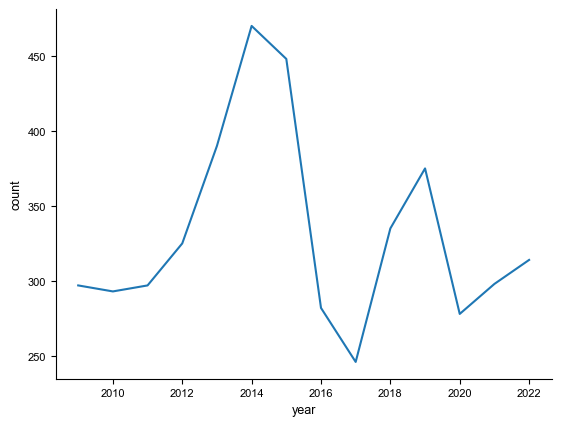

In [29]:
sns.lineplot(data=df_byYear[df_byYear['problem_type_1']=='Agression'], x='year', y='count')

<Axes: xlabel='month', ylabel='count'>

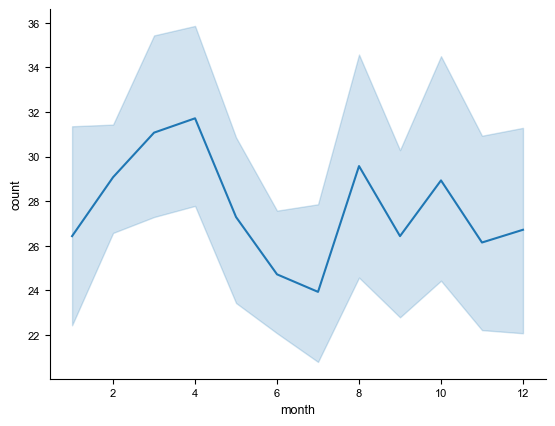

In [30]:
sns.lineplot(data=df_byMonth[df_byMonth['problem_type_1']=='Agression'], x='month', y='count')

<Axes: xlabel='week_day', ylabel='count'>

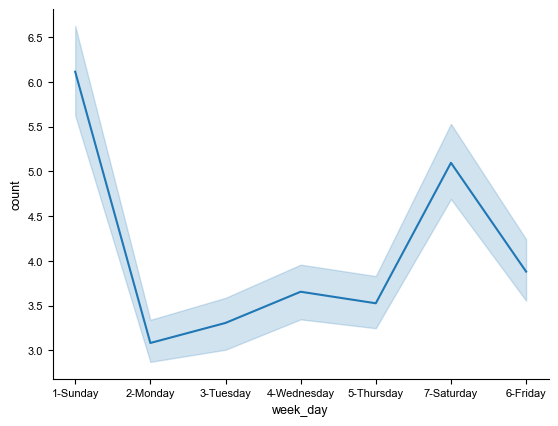

In [31]:
sns.lineplot(data=df_byWeekDay[df_byWeekDay['problem_type_1']=='Agression'], x='week_day', y='count')

Here, I'm creating a database with some demographics 

In [59]:
df_demo = pd.read_csv('raw_db/demographics_Curitiba.csv')

In [60]:
df_demo.head()

,neighbourhood,area_km2,n_men,n_women,n_people,n_houses,avg_monthlyIncome,regional_name
0,Abranches,"4,32",5 463,5 702,11 165,3 154,"1 009,67",BOA VISTA
1,Água Verde,"4,76",22 546,27 320,49 866,17 045,"3 332,57",PORTÃO
2,Ahú,"1,84",5 117,6 031,11 148,3 608,"2 827,81",MATRIZ
3,Alto Boqueirão,"12,11",24 824,26 331,51 155,14 301,"1 110,63",BOQUEIRÃO
4,Alto da Glória,"0,88",2 513,3 075,5 588,2 125,"3 263,47",MATRIZ


In [61]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   neighbourhood      76 non-null     object
 1   area_km2           76 non-null     object
 2   n_men              76 non-null     object
 3   n_women            76 non-null     object
 4   n_people           76 non-null     object
 5   n_houses           76 non-null     object
 6   avg_monthlyIncome  76 non-null     object
 7   regional_name      76 non-null     object
dtypes: object(8)
memory usage: 4.9+ KB


In [62]:
df_demo.drop('neighbourhood', axis=1, inplace=True)

In [63]:
df_demo.area_km2          = df_demo.area_km2.apply(lambda x: x.replace(',','.'))
df_demo.avg_monthlyIncome = df_demo.avg_monthlyIncome.apply(lambda x: x.replace(',','.'))

df_demo.n_men    = df_demo.n_men.apply(lambda x: ''.join(x.split())) # to eliminate the spaces
df_demo.n_women  = df_demo.n_women.apply(lambda x: ''.join(x.split()))
df_demo.n_people = df_demo.n_people.apply(lambda x: ''.join(x.split()))
df_demo.n_houses = df_demo.n_houses.apply(lambda x: ''.join(x.split()))
df_demo.avg_monthlyIncome = df_demo.avg_monthlyIncome.apply(lambda x: ''.join(x.split()))

In [64]:
num_feat = ['area_km2', 'avg_monthlyIncome']
int_feat = ['n_men', 'n_women', 'n_people', 'n_houses']

df_demo[num_feat] = df_demo[num_feat].astype('float16')
df_demo[int_feat] = df_demo[int_feat].astype('int')


In [65]:
df_demo_groupped = df_demo.groupby(['regional_name']).sum()

In [66]:
df_demo_groupped.avg_monthlyIncome = df_demo.groupby(['regional_name']).mean()['avg_monthlyIncome']

In [67]:
df_demo_groupped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, BAIRRO NOVO to TATUQUARA
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_km2           10 non-null     float32
 1   n_men              10 non-null     int32  
 2   n_women            10 non-null     int32  
 3   n_people           10 non-null     int32  
 4   n_houses           10 non-null     int32  
 5   avg_monthlyIncome  10 non-null     float32
dtypes: float32(2), int32(4)
memory usage: 320.0+ bytes


In [68]:
df_demo_groupped.area_km2 = df_demo_groupped.area_km2.round(1)
df_demo_groupped.avg_monthlyIncome = df_demo_groupped.avg_monthlyIncome.round()

In [69]:
df_demo_groupped['pop_km2'] = df_demo_groupped['n_people'] / df_demo_groupped['area_km2']
df_demo_groupped['people_house'] = df_demo_groupped['n_people'] / df_demo_groupped['n_houses']

In [70]:
df_demo_groupped

,area_km2,n_men,n_women,n_people,n_houses,avg_monthlyIncome,pop_km2,people_house
regional_name,,,,,,,,
BAIRRO NOVO,44.799999,61578,62752,124330,46899,870.0,2775.223262,2.651016
BOA VISTA,62.200001,107858,117838,225786,65970,1612.0,3629.999955,3.422556
BOQUEIRÃO,39.799999,91310,96882,188192,53773,1338.0,4728.442302,3.499749
CAJURU,35.299999,94806,100936,195742,42997,1384.0,5545.099270,4.552457
CIC,61.599998,81356,84836,166192,45798,523.0,2697.922145,3.628805
MATRIZ,36.299999,91452,110852,202304,73112,2897.0,5573.113065,2.767042
PINHEIRINHO,15.800000,29944,32339,62283,24159,842.0,3941.961978,2.578045
PORTÃO,39.799999,116283,130205,246488,78178,1516.0,6193.165948,3.152907
SANTA FELICIDADE,64.099998,62340,67455,129795,37669,1681.0,2024.883044,3.445672


In [71]:
groups = ['year', 'month', 'week_day', 'time', 'hour_rads','regional_name','categories','problem_type_1']

df_byTime = df.groupby(groups).count()
df_byTime['count'] = df_byTime['day']
df_byTime.reset_index(inplace=True)
df_byTime.sort_values(by=["time"], ascending=True)


,year,month,week_day,time,hour_rads,regional_name,categories,problem_type_1,Unnamed: 0,neighbourhood,...,operation_name,call_origin,office_name,office_abbreviation,service_name,team_situation,156_protocol_number,day,weekDay_rads,count
0,2009,1,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Agression,1,1,...,0,1,1,1,1,0,0,1,1,1
8166,2011,4,5-Thursday,0,1.570796,BAIRRO NOVO,CriminalBehaviour,Gunshot,1,1,...,0,1,1,1,1,0,0,1,1,1
8167,2011,4,5-Thursday,0,1.570796,MATRIZ,CriminalBehaviour,Illitcit Substance,1,1,...,0,1,1,1,1,0,0,1,1,1
58001,2019,8,1-Sunday,0,1.570796,PINHEIRINHO,CriminalBehaviour,Violation of Protective Measures for women - L...,1,1,...,1,1,1,1,1,1,0,1,1,1
58000,2019,8,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Illitcit Substance,1,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42075,2017,2,3-Tuesday,23,1.832596,MATRIZ,CriminalBehaviour,Supplying alcohol to minors,1,1,...,1,1,1,1,1,1,0,1,1,1
42150,2017,2,4-Wednesday,23,1.832596,BOA VISTA,CriminalBehaviour,Robbery,1,1,...,1,1,1,1,1,1,0,1,1,1
42151,2017,2,4-Wednesday,23,1.832596,SANTA FELICIDADE,CriminalBehaviour,Robbery,1,1,...,1,1,1,1,1,1,0,1,1,1
13545,2012,7,2-Monday,23,1.832596,SANTA FELICIDADE,CriminalBehaviour,Fishing in Prohibited Places,1,1,...,0,1,1,1,1,0,0,1,1,1


In [72]:
columns2keep = groups + ['count']
df_byTime = df_byTime.loc[:,columns2keep]
df_byTime.head(10)

,year,month,week_day,time,hour_rads,regional_name,categories,problem_type_1,count
0,2009,1,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Agression,1
1,2009,1,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Robbery,1
2,2009,1,1-Sunday,0,1.570796,PORTÃO,CriminalBehaviour,Robbery,1
3,2009,1,1-Sunday,1,1.308997,BOQUEIRÃO,CriminalBehaviour,Break-in,1
4,2009,1,1-Sunday,1,1.308997,MATRIZ,CriminalBehaviour,Theft,1
5,2009,1,1-Sunday,3,0.785398,MATRIZ,CriminalBehaviour,Illitcit Substance,1
6,2009,1,1-Sunday,5,0.261799,PINHEIRINHO,CriminalBehaviour,Break-in,1
7,2009,1,1-Sunday,6,0.000000,PORTÃO,CriminalBehaviour,Robbery,1
8,2009,1,1-Sunday,7,6.021386,CAJURU,CriminalBehaviour,Break-in,1
9,2009,1,1-Sunday,7,6.021386,CIC,CriminalBehaviour,Robbery,1


In [74]:
df_byTime['count'].unique()

array([ 1,  2,  3,  6,  5,  4,  7,  8, 11,  9, 12, 14, 10], dtype=int64)

In [75]:
df_demo_groupped.reset_index(inplace=True)

In [76]:
df_demo_groupped

,regional_name,area_km2,n_men,n_women,n_people,n_houses,avg_monthlyIncome,pop_km2,people_house
0,BAIRRO NOVO,44.799999,61578,62752,124330,46899,870.0,2775.223262,2.651016
1,BOA VISTA,62.200001,107858,117838,225786,65970,1612.0,3629.999955,3.422556
2,BOQUEIRÃO,39.799999,91310,96882,188192,53773,1338.0,4728.442302,3.499749
3,CAJURU,35.299999,94806,100936,195742,42997,1384.0,5545.099270,4.552457
4,CIC,61.599998,81356,84836,166192,45798,523.0,2697.922145,3.628805
5,MATRIZ,36.299999,91452,110852,202304,73112,2897.0,5573.113065,2.767042
6,PINHEIRINHO,15.800000,29944,32339,62283,24159,842.0,3941.961978,2.578045
7,PORTÃO,39.799999,116283,130205,246488,78178,1516.0,6193.165948,3.152907
8,SANTA FELICIDADE,64.099998,62340,67455,129795,37669,1681.0,2024.883044,3.445672
9,TATUQUARA,41.000000,23082,23067,46149,12117,518.0,1125.585366,3.808616


In [77]:
df_byTime.regional_name.unique()

array(['MATRIZ', 'PORTÃO', 'BOQUEIRÃO', 'PINHEIRINHO', 'CAJURU', 'CIC',
       'BOA VISTA', 'BAIRRO NOVO', 'SANTA FELICIDADE',
       'REGIÃO METROPOLITANA', 'TATUQUARA'], dtype=object)

In [78]:
for idx, row in df_demo_groupped.iterrows():
    index_df = df_byTime[df_byTime['regional_name']==row['regional_name']].index

    df_byTime.loc[index_df, 'nProb_km2']    = df_byTime.loc[index_df, 'count'] / row['area_km2'] # problems / km2
    # df_byTime.loc[index_df, 'nProb_pop_km2'] = df_byTime.loc[index_df, 'count'] / row['n_people'] # problems / pop / km2

    df_byTime.loc[index_df, 'avg_monthlyIncome'] = row['avg_monthlyIncome']
    df_byTime.loc[index_df, 'pop_km2']           = np.round(row['pop_km2'])
    df_byTime.loc[index_df, 'people_house']      = np.round(row['people_house'],2)

In [79]:
df_byTime

,year,month,week_day,time,hour_rads,regional_name,categories,problem_type_1,count,nProb_km2,avg_monthlyIncome,pop_km2,people_house
0,2009,1,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Agression,1,0.027548,2897.0,5573.0,2.77
1,2009,1,1-Sunday,0,1.570796,MATRIZ,CriminalBehaviour,Robbery,1,0.027548,2897.0,5573.0,2.77
2,2009,1,1-Sunday,0,1.570796,PORTÃO,CriminalBehaviour,Robbery,1,0.025126,1516.0,6193.0,3.15
3,2009,1,1-Sunday,1,1.308997,BOQUEIRÃO,CriminalBehaviour,Break-in,1,0.025126,1338.0,4728.0,3.50
4,2009,1,1-Sunday,1,1.308997,MATRIZ,CriminalBehaviour,Theft,1,0.027548,2897.0,5573.0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81187,2022,12,7-Saturday,22,2.094395,CIC,CriminalBehaviour,Violation of Protective Measures for women - L...,1,0.016234,523.0,2698.0,3.63
81188,2022,12,7-Saturday,22,2.094395,PINHEIRINHO,CriminalBehaviour,Violation of Protective Measures for women - L...,1,0.063291,842.0,3942.0,2.58
81189,2022,12,7-Saturday,22,2.094395,TATUQUARA,CriminalBehaviour,Violation of Protective Measures for women - L...,1,0.024390,518.0,1126.0,3.81
81190,2022,12,7-Saturday,23,1.832596,BOQUEIRÃO,CriminalBehaviour,Physical/Verbal Agression,1,0.025126,1338.0,4728.0,3.50


In [80]:
df_byTime.to_csv('db_criminalBehaviour_DateRegional.csv')